In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

/home/aspiring1/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
wisc_emp = pd.read_csv('../wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']
wisc_emp.head()

,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7


In [3]:
print('Shape of the dataframe: ', wisc_emp.shape)

Shape of the dataframe:  (178, 2)


In [4]:
missing = (pd.isnull(wisc_emp['Month']) | wisc_emp['Employment'].isnull())
print('Number of missing values found: ', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found:  0


In [5]:
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag = 'AIC')

In [6]:
print('The p-value of the ADF test on the irregular variations in the employment data: ', adf_result[1])

The p-value of the ADF test on the irregular variations in the employment data:  0.9810000189539194


In [7]:
decompose_model = seasonal.seasonal_decompose(wisc_emp['Employment'].tolist(), freq = 12, model='additive')

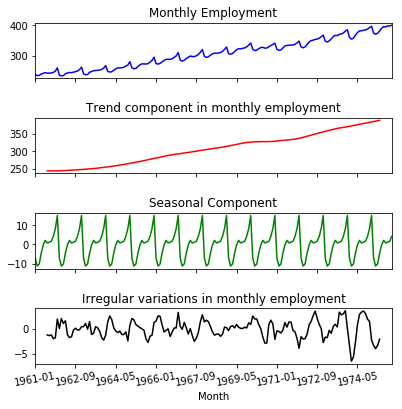

In [8]:
#Plotting the original time series, trend , seasonal component & residuals.
fig, axarr = plt.subplots(4, sharex = True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(color = 'b', ax = axarr[0], linestyle = '-')
axarr[0].set_title('Monthly Employment')

pd.Series(data = decompose_model.trend, index = wisc_emp.index).plot(color = 'r', linestyle = '-', ax= axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data = decompose_model.seasonal, index = wisc_emp.index).plot(color = 'g', linestyle = '-', ax = axarr[2])
axarr[2].set_title('Seasonal Component')

pd.Series(data = decompose_model.resid, index = wisc_emp.index).plot(color = 'k', linestyle = '-', ax =axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 2.0)
_ = plt.xticks(rotation = 10)

In [9]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]]) # since it 
# a tuple, so [0]- although without using index [0] also works!

In [10]:
print('The p-value for the residual of the wisconsin employment time series is: ', adf_result[1])

The p-value for the residual of the wisconsin employment time series is:  0.006560931634641524


In [11]:
decompose_model = seasonal.seasonal_decompose(wisc_emp['Employment'].tolist(), freq = 12, model='multiplicative')
adf_result = stattools.adfuller(decompose_model.resid[~pd.isnull(decompose_model.resid)], autolag = 'AIC')
print('The p-value for the original wisconsin employment dataframe is: ', adf_result[1])

The p-value for the original wisconsin employment dataframe is:  0.0012347837267735362


### Multiplicative Method

In [12]:
decompose_model = seasonal.seasonal_decompose(wisc_emp['Employment'].tolist(),
                                             freq = 12, model = 'multiplicative')

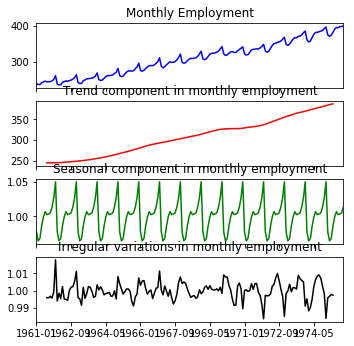

In [13]:
fig, axarr = plt.subplots(4, sharex = True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(color ='b', ax = axarr[0], linestyle = '-')
axarr[0].set_title('Monthly Employment')

axarr[1].plot(decompose_model.trend, color = 'r', linestyle = '-')
axarr[1].set_title('Trend component in monthly employment')

axarr[2].plot(decompose_model.seasonal, color = 'g', linestyle = '-')
axarr[2].set_title('Seasonal component in monthly employment')

axarr[3].plot(decompose_model.resid, color = 'k', linestyle = '-')
axarr[3].set_title('Irregular variations in monthly employment')

In [14]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], autolag = 'AIC')

In [15]:
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267735362
